# 4. Assignment


## 4.1 Load the file
First, please download the pima_clean.csv file on your local computer. The dataframe you exported yesterday, should be the same as this one.

Then, please run the cell below and select the pima_clean.csv file

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima_clean.csv to pima_clean.csv


In [ ]:
pima = pd.read_csv("pima_clean.csv")

## 4.2 Display the head of the file
Display the head of the csv-file.

In [ ]:
#Solution
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,41-50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,31-40
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,31-40
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,21-30
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,31-40


## 4.3 Depict missing values
As a refresher: Please depict the number of missing values per column.

In [ ]:
#Solution
pima.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 2
SkinThickness               194
Insulin                     341
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
Age_group                     0
dtype: int64

## 4.4 Display mean and median
Display the mean and the median of all numeric variables in the dataframe. Choose a function, which excludes NaN values from the calculation.

In [ ]:
#Solution with Pandas
pima.median()

Pregnancies                   3.00
Glucose                     117.00
BloodPressure                72.00
SkinThickness                29.00
Insulin                     125.00
BMI                          32.30
DiabetesPedigreeFunction      0.38
Age                          29.00
Outcome                       0.00
dtype: float64

In [ ]:
#Solution
pima.mean()

Pregnancies                   3.865306
Glucose                     121.835616
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.298503
DiabetesPedigreeFunction      0.476392
Age                          33.364626
Outcome                       0.344218
dtype: float64

## 4.5 Median and IQR
Obtain the Median and IQR for all numeric variables, stratified by Outcome.
(one line of code)

In [ ]:
#Solution
pima.groupby("Outcome").quantile([0.25,0.5,0.75])

Pregnancies  Glucose  ...  DiabetesPedigreeFunction   Age
Outcome                             ...                                
0       0.25          1.0     93.5  ...                   0.23325  23.0
        0.50          2.0    108.0  ...                   0.34000  27.0
        0.75          5.0    125.5  ...                   0.56925  37.0
1       0.25          2.0    119.0  ...                   0.26800  28.0
        0.50          5.0    140.0  ...                   0.45200  36.0
        0.75          8.0    167.5  ...                   0.73100  45.0

[6 rows x 8 columns]

In [ ]:
def interquartile_range(df):
    p75 = np.percentile(df, 75)  # 75th percentile
    p25 = np.percentile(df, 25)  # 75th percentile
    iqr = p75 - p25  # Interquartile Range
    return iqr

In [ ]:
#Slice the dataframe by Outcome
pima_out0 = pima.loc[pima.Outcome==0, pima.columns != 'Age_group']
pima_out1 = pima.loc[pima.Outcome==1, pima.columns != 'Age_group']

In [ ]:
median_iqr_df = pd.DataFrame(pima_out0.median(), columns=['median_out0'])
median_iqr_df['median_out1'] = pima_out1.median()
median_iqr_df['iqr_out0'] = pima_out0.dropna().apply(lambda x : interquartile_range(x))
median_iqr_df['iqr_out1'] = pima_out1.dropna().apply(lambda x : interquartile_range(x))
median_iqr_df

,median_out0,median_out1,iqr_out0,iqr_out1
Pregnancies,2.00,5.000,3.0000,6.00000
Glucose,108.00,140.000,32.0000,47.50000
BloodPressure,70.00,74.500,16.0000,15.50000
SkinThickness,27.00,32.000,15.5000,13.75000
Insulin,102.50,169.500,96.5000,111.75000
BMI,30.15,34.300,10.0500,6.75000
DiabetesPedigreeFunction,0.34,0.452,0.3665,0.45675
Age,27.00,36.000,8.0000,15.75000
Outcome,0.00,1.000,0.0000,0.00000


## 4.6 Seaborn pairplot
Plot a seaborn scatter-pairplot between the variables:  
Age, Pregnancies, Glucose, Bloodpressure and Skinthickness, stratified by Outcome

(This might take a few seconds to load)



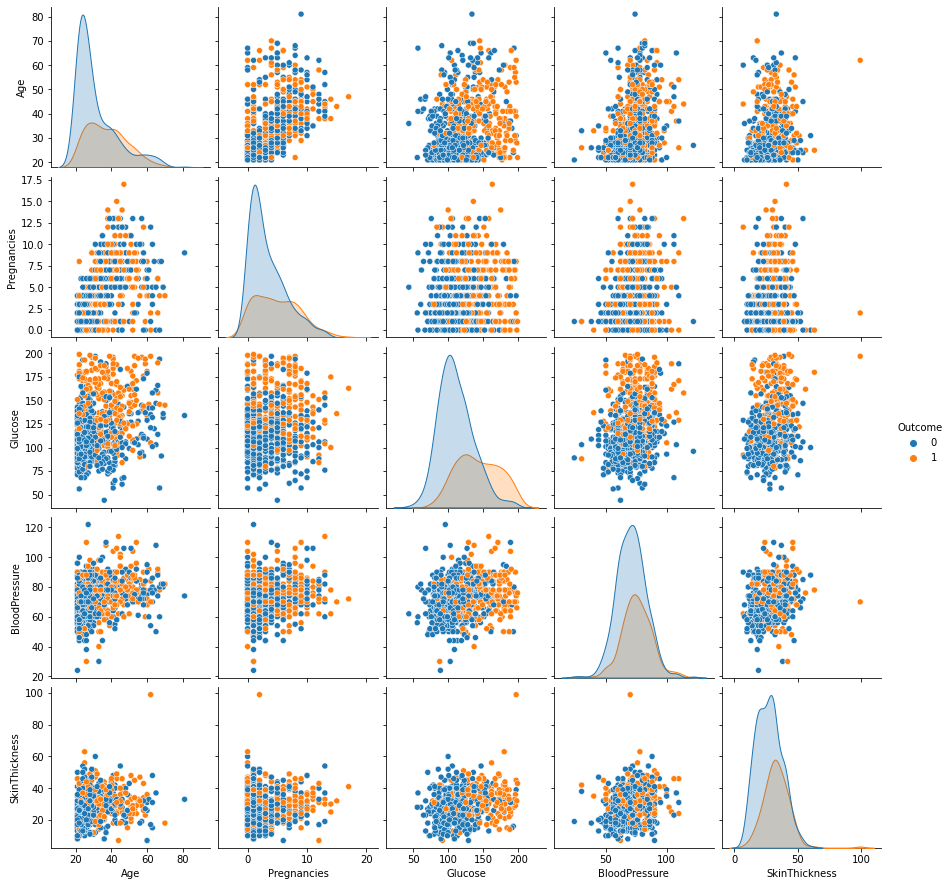

In [ ]:
#Solution
import seaborn as sns
sns.pairplot(data=pima[['Age', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Outcome']], 
             hue="Outcome")

## 4.7 Seaborn Boxplot
Plot a boxplot with Seaborn, which depicts the distribution of Insulin across all Agegroups, stratified by the diabetes outcome. Which differences can you see in this plot?

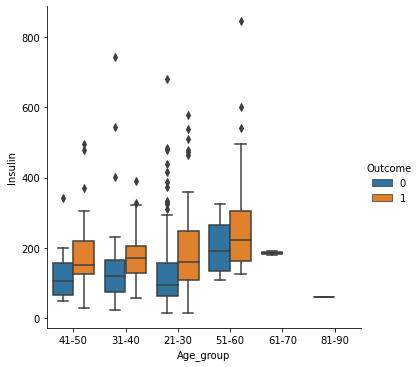

In [ ]:
#Solution
sns.catplot(data=pima, kind="box", x="Age_group", y="Insulin", hue="Outcome")
#Women with diabetes have higher Insulin levels 
#Seems like the Insulin levels increase with age among diabetic and non-diabetic

## 4.8 Seaborn Boxplot
Plot a boxplot, which compares the number of Pregnancies between Women with and without Diabetes-Outcome. Describe what you see.

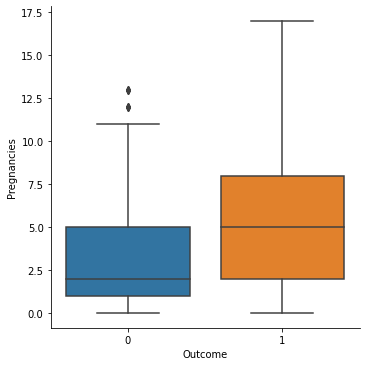

In [ ]:
#Solution
sns.catplot(data=pima, kind="box", x="Outcome", y="Pregnancies")

## 4.9 Seaborn Barplot
Plot a barplot, depicting the Diabetes Pedigree Function vs. the Outcome. What can you see?

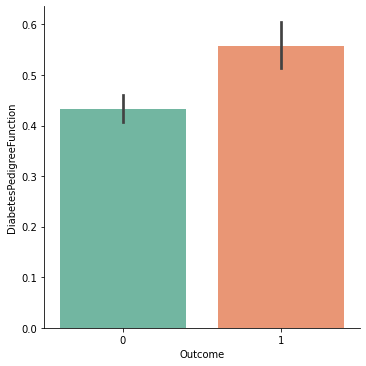

In [ ]:
#Barplot with the palette 'Set2'
sns.catplot(data=pima, kind="bar", x="Outcome", y="DiabetesPedigreeFunction", palette='Set2')

## 4.10 Matplotlib figure
Use matplotlib and create a figure with two scatter-subplots. The first subplot should plot SkinThickness (x-axis) vs. BMI (y-axis) and the second subplot showing Insulin (x-axis) vs. BMI (y-axis). Depict the subplots horizontally next to each other and add axis titles on each x- and y-axis.

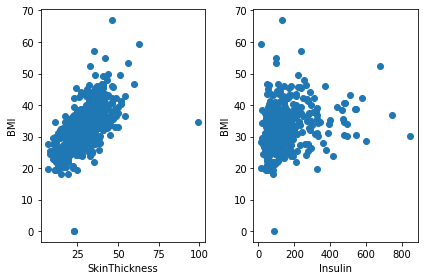

In [ ]:
#Solution
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(pima['SkinThickness'], pima['BMI'])
ax2.scatter(pima['Insulin'], pima['BMI'])

ax1.set_xlabel('SkinThickness')
ax1.set_ylabel('BMI')
ax2.set_xlabel('Insulin')
ax2.set_ylabel('BMI')

fig.tight_layout()

## 4.11 Pearson-Correlation
Look at your plot above. Is there a correlation between SkinThickness and BMI?   
a) Perform a Pearson-Correlaton test to find out.  
b) Do the same for Insulin and BMI.

In [ ]:
#Solution
r, p = stats.pearsonr(pima.dropna()['SkinThickness'], pima.dropna()['BMI'])

print("The correlation coefficient is {} and the p-value {}.".format(r, p))

The correlation coefficient is 0.6528765336545811 and the p-value 4.167597189116187e-49.


In [ ]:
#Solution
r, p = scipy.stats.pearsonr(pima.dropna()['Insulin'], pima.dropna()['BMI'])

print("The correlation coefficient is {} and the p-value {}.".format(r, p))

The correlation coefficient is 0.22675591604350528 and the p-value 5.6196267841608635e-06.


## 4.12 Test if normally distributed
a) Test for each continuous variable (Pregnancies, BMI, BloodPressure, Glucose, Insulin, DiabetesPedigree function, SkinThickness) if they are normally distributed.  
Hint: You have to filter out missing variable-values.

b) Compare the test results with the distributions (diagonale axis) from the pairplot. Do the Shapiro-results match what you see from these distributions?

c) Would you perform a t-test for these variables?

In [ ]:
#Solution
print('Pregnancies: ', scipy.stats.shapiro(pima.Pregnancies)) 
print('BMI', scipy.stats.shapiro(pima.BMI))
print('BloodPressure: ', scipy.stats.shapiro(pima.BloodPressure[~pima.BloodPressure.isna()]))
print('Glucose: ', scipy.stats.shapiro(pima.Glucose[~pima.Glucose.isna()]))
print('Insulin: ', scipy.stats.shapiro(pima.Insulin[~pima.Insulin.isna()]))
print('DiabetesPedigree: ', scipy.stats.shapiro(pima.DiabetesPedigreeFunction))
print('SkinThickness: ', scipy.stats.shapiro(pima.SkinThickness[~pima.SkinThickness.isna()]))

#Even though the distributions are divided by Outcome 0 and 1, they also don't look normal.
#Would not perform a t-test as the data is not normally distributed

Pregnancies:  (0.9042123556137085, 4.727203914802007e-21)
BMI (0.9716621041297913, 9.803314410250508e-11)
BloodPressure:  (0.9903179407119751, 9.483767644269392e-05)
Glucose:  (0.9691873788833618, 2.8381502009677817e-11)
Insulin:  (0.8040995597839355, 1.698205432642417e-21)
DiabetesPedigree:  (0.8365598917007446, 8.88180958378666e-27)
SkinThickness:  (0.9679988622665405, 1.7753793990493705e-09)


## 4.13 Test if significantly different
We want to find out if the number of Pregnancies are significantly different between women with and without a Diabetes Outcome. Which hypothesis-test would you use for this task?


In [ ]:
#Solution:
#Mann-Whitney-U/Wilcoxon Rank - two-sided
import scipy.stats as stats

preg_Outcome0 = pima.Pregnancies[pima.Outcome==0]
preg_Outcome1 = pima.Pregnancies[pima.Outcome==1]

stats.mannwhitneyu(preg_Outcome0, preg_Outcome1, alternative='two-sided')

MannwhitneyuResult(statistic=45117.0, pvalue=5.290648527502528e-09)

## 4.14 Test if significantly different
Now, test if women with higher numbers of pregnancies on average have more Diabetes Outcomes.
Hint: Use the same test, but adjust the 'alternative' parameter.

In [ ]:
#Solution:
stats.mannwhitneyu(preg_Outcome0, preg_Outcome1, alternative='less')

MannwhitneyuResult(statistic=45117.0, pvalue=2.645324263751264e-09)

## 4.15 Test if significantly different
We want to know if there is a significant difference between Diabetes Outcomes in different Age-groups. Apply the appropriate test and conclude whether you accept or reject the null-Hypothesis (H0).

Hint: Use the pandas crosstab function to form the contingency table.

In [ ]:
#Solution
contingency = pd.crosstab(pima.Age_group, pima.Outcome)
print(contingency)

#Chi-square test
from scipy.stats import chi2_contingency 
stat, p, dof, expected = chi2_contingency(contingency)
print('p-value: ',p)
#Yes the Outcomes are significantly different between Age-groups

Outcome      0   1
Age_group         
21-30      315  81
31-40       78  71
41-50       47  63
51-60       23  31
61-70       18   7
81-90        1   0
p-value:  8.126294903639908e-17


# Optional Bonus: Distributions
For those who were super fast with this assignment and who want to learn more about data distributions and how to deal with them in Python.  

In Data Science we want to understand the pattern of data. This includes understanding the distribution where the data samples come from. This information can help us to estimate how likely it is to 'see' a certain sample. In this Bonus we will look at 3 common distributions, every data scientist should know.  


### Binomial distribution
The binomial distribution is one of the most important distributions in data science. It becomes relevant when we deal with a binary variable with a 0 or 1 outcome.  

One example: Hospital A performs a certain medical test on average 11 times per day, of which 72% it is positive. Hospital B performs the same test 15 times per day of which 48% are positive.  

We want to know: 
*   What is the probability that hospital A obtains 6 positive test results per day?
*   What is the probability that hospital B obtains 6 positive test results per day?

The probability function for a binomial distribution is: $$Pr(X=k)=C(n,k)p^k (1-p)^{n-k}$$
where 
*   n=number of trials
*   k=number of positive outcomes (1)
* p = the probability of a positive test and 1-p the error probability (often: q)

C(n,k) is the number of all possible combinations of N and k at a certain timepoint. 
Mathematically speaking: $$C(n,k) =  \frac{n!}{k!(n-k)!}$$






Let's use the [scipy package](https://docs.scipy.org/doc/scipy/reference/) for these questions. It is the 'scientific library' for python and provides many functions for numerical operations and routines (e.g. numerical integration, optimization, ...) with numpy-arrays. 

In [ ]:
p_A = .72
p_B = .48

# Number of tests
n_A = 11
n_B = 15
k = 6 #six positive tests

# Importiere scipy
import scipy.special as sc

# Definiere C(n,k)
comb_A = sc.comb(n_A,k)

# Berechne die Wahrscheinlichkeit!
answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

# Formattiere die Ausgabe in Prozent!
answer_A = 100*answer_A

#Same for hospital B 
p_B = .48
n_B = 15
comb_B = sc.comb(n_B,k)
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

print ('The probability of hospital A having six positive tests on a day is %1.1f%% ' %answer_A)
print (' \n')
print ('The probability of hospital B having six positive tests on a day is %1.1f%% ' %answer_B)

The probability of hospital A having six positive tests on a day is 11.1% 
 

The probability of hospital B having six positive tests on a day is 17.0% 


Let's look at the average and standard deviation of the binomial distribution:  

The average is simply multiplying the number of trials times the probability of a positive result: $$\mu=n*p$$

The standard deviation is determined as 
$$\sigma=\sqrt{n*q*p}$$ 

Now we can ask: What is the average number of positive test results which a hospital will obtain?

We will use the [binom.stats()](https://het.as.utexas.edu/HET/Software/Scipy/generated/scipy.stats.binom.html) function from the scipy package. 

In [ ]:
from scipy.stats import binom
mean,var,skew = binom.stats(n_A,p_A, moments='mvs') #moment specifies mean, variance, skew
print(mean)
print(var**0.5)

7.92
1.4891608375189027


In [ ]:
#For hospital B
mean,var, skew= binom.stats(n_B,p_B,moments='mvs')
print(mean)
print(var**0.5)

7.199999999999999
1.9349418595916519


Now we want to have a probability function of a given number of trials and success probability. To obtain the probability mass function of this distribution, we use the pmf() function. 

In [ ]:
#Define number of trials and probability of obtaining '1'.
n=10
p=0.5

# Define n successes. The index starts at 0 in python, therefore we set n+1
x = range(n+1)

# Erstelle die Wahrscheinlichkeitsfunktion
Y = binom.pmf(x,n,p)

# Ausgabe
Y

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

Last but not least. If we want to generate binomial distributed data, we do this with

In [ ]:
# result of flipping a coin 10 times, tested 100 times.
n=10
p=0.5
new = np.random.binomial(n, p, 100)
new

array([3, 6, 7, 8, 5, 7, 7, 3, 4, 6, 5, 3, 5, 4, 4, 9, 8, 5, 4, 3, 4, 5,
       5, 2, 5, 5, 5, 3, 5, 9, 3, 5, 6, 5, 7, 6, 7, 3, 2, 5, 7, 7, 8, 6,
       3, 4, 5, 6, 7, 5, 3, 8, 6, 6, 7, 4, 4, 3, 5, 6, 4, 6, 7, 4, 4, 5,
       5, 6, 4, 6, 5, 6, 6, 7, 3, 5, 5, 3, 5, 5, 3, 3, 6, 3, 4, 4, 5, 1,
       4, 5, 2, 5, 5, 4, 6, 3, 6, 6, 7, 3])

In [ ]:
# result of flipping a coin once, tested 100 times. #Generate binary data
n=1
p=0.5
new = np.random.binomial(n, p, 100)
new

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])

### Normal distribution
The Normal (also: Gaussian) distribution is another important distribution. 

The probability density function is 
## $$  f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-1}{2z^2} $$
where $$z=\frac{(X-\mu)}{\sigma}$$

The characteristics of this distribution are:
*   Symmetric
*   The peak represents the average
* The (bell-) shape is determined by the standard deviation (small $\sigma$ it is high and narrow, for big $\sigma$ it is wide and small. 
* Area under the Curve is 1
* The average=Median
* if mean and sd are 0 and 1, respectively it is a "Standard normal distribution"



In [ ]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

Let's set up a Normal distribution with Scipy

In [ ]:
from scipy import stats
mean = 0
std = 1

# Set a range X
X = np.arange(-4,4,0.1)

# Set up the normal distribution for X
Y = stats.norm.pdf(X,mean,std)
Y

array([1.33830226e-04, 1.98655471e-04, 2.91946926e-04, 4.24780271e-04,
       6.11901930e-04, 8.72682695e-04, 1.23221917e-03, 1.72256894e-03,
       2.38408820e-03, 3.26681906e-03, 4.43184841e-03, 5.95253242e-03,
       7.91545158e-03, 1.04209348e-02, 1.35829692e-02, 1.75283005e-02,
       2.23945303e-02, 2.83270377e-02, 3.54745928e-02, 4.39835960e-02,
       5.39909665e-02, 6.56158148e-02, 7.89501583e-02, 9.40490774e-02,
       1.10920835e-01, 1.29517596e-01, 1.49727466e-01, 1.71368592e-01,
       1.94186055e-01, 2.17852177e-01, 2.41970725e-01, 2.66085250e-01,
       2.89691553e-01, 3.12253933e-01, 3.33224603e-01, 3.52065327e-01,
       3.68270140e-01, 3.81387815e-01, 3.91042694e-01, 3.96952547e-01,
       3.98942280e-01, 3.96952547e-01, 3.91042694e-01, 3.81387815e-01,
       3.68270140e-01, 3.52065327e-01, 3.33224603e-01, 3.12253933e-01,
       2.89691553e-01, 2.66085250e-01, 2.41970725e-01, 2.17852177e-01,
       1.94186055e-01, 1.71368592e-01, 1.49727466e-01, 1.29517596e-01,
      

In [ ]:
#generate 10 normally distributed values
mu,sigma = 0,0.1
norm_set = np.random.normal(mu,sigma,10)
norm_set

array([-0.1264259 , -0.11846906,  0.00346062,  0.00613764, -0.1265709 ,
        0.05881675,  0.01891987, -0.0457691 ,  0.06601896, -0.04814076])

### Poisson distribution

*   shows the likely number of times that an event will occur within a pre-determined period of time.
*   It is used for independent events which occur at a constant rate within a given interval of time. 
* the event can only be measured as occurring or not as occurring (whole numbers).
* The Poisson probability mass function is defined as $f(k) = \frac{\mu^k e^{-k}}{k!}$
* $\mu$ is a shape parameter. It also describes the expected probability of the event. 
* k is again the number of events 


Example: What is the probability to have 7 Emergency room admissions from 2pm-4pm on a Wednesday? 
*   Look at admission data from week before: There were 10 admissions from 2pm-4pm
*   The expected average $\mu$ is 10





In [ ]:
from scipy.stats import poisson

# Set the average of ER-admissions during 2-4pm
mu = 10

# Obtain mean and variance
mean,var = poisson.stats(mu)

print('Mean:', mean)
print('Var:', var)

Mean: 10.0
Var: 10.0


In [ ]:
# We can caluclate the probability mass function for specific points: E.g. exactly 7 admissions
odds_seven = poisson.pmf(7,mu)

#Ausgabe
print('The probability that there will be exactly 7 ER-admissions between 2-4pm on Wednesdays is %2.2f %%'%(100*odds_seven))
print('The average is %2.2f ' %mean)

The probability that there will be exactly 7 ER-admissions between 2-4pm on Wednesdays is 9.01 %
The average is 10.00 


Probability mass functions can look like this. Here $\lambda = \mu$. Note how the peaks are at $\lambda = \mu$. 


Source: By Skbkekas - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=9447142

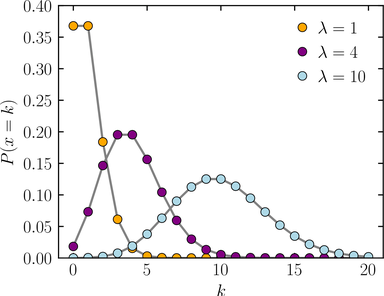

Now we want to know: What is the probability that there will be more than 10 admissions in that timeframe?

In [ ]:
# Let's look at the probability mass function for up to (k=) 30 admissions 

k=np.arange(30)
k

pmf_pois = poisson.pmf(k,mu)

#Since we will talk about plotting later, we will look at the Wikipedia pmf
#Here lamda = mu

To answer our question we can use the cumulative distribution function (CDF). With the CDF we can determine the probabilities smaller or equal than k. The CDF basically sums up the probabilities on the mass function (above) until our specified k.  
I.e. P(X=k=1)+ P(X=k=2) + P(X=k=3), ....  


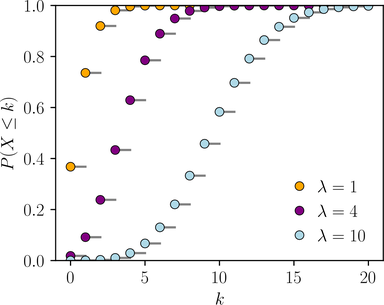

In [ ]:
# k = 10 admissions, mean = 10 average during that time frame
k,mu = 10,10

#Probability to see 10 or fewer admissions:
prob_up_to_ten = poisson.cdf(k,mu)

# Ausgabe
print ('The probability to have 10 or fewer admissions is %2.1f %%.' %(100*prob_up_to_ten))

The probability to have 10 or fewer admissions is 58.3 %.


But we want to know the probability of MORE than k admissions. To find this, we can just substract the probability of seeing up to k admissions from the entire probability space, which is 1. 

In [ ]:
prob_more_than_ten = 1 - prob_up_to_ten

print('The probability that we see 10 or more admissions is %2.1f %%.' %(100*prob_more_than_ten))

The probability that we see 10 or more admissions is 41.7 %.


Last but not least: To generate numbers following a pre-specified Poisson-distribution, we can use numpy or scipy

In [ ]:
from numpy.random import seed
#set seed (to make this example reproducible)
seed(0)

#Generate dataset of 100 values that follow a Poisson distribution with mean=5
#With numpy: 
data_1 = np.random.poisson(5, 100)
#With scipy.stats
data_2 = scipy.stats.poisson.rvs(5, size=100)